In [74]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [75]:
data=pd.read_csv("autos.csv", encoding="latin1")
df=pd.DataFrame(data)

In [76]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [77]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [78]:
data['vehicleType'].isnull().values.sum()

37869

In [79]:
data['vehicleType'].fillna("other",inplace=True)
data['vehicleType'].isnull().values.sum()

0

In [80]:
data['offerType'].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [81]:
data['offerType']=data['offerType'].map({'Gesuch':"Application","Angebot":"Offer"})

In [82]:
data['offerType'].unique()

array(['Offer', 'Application'], dtype=object)

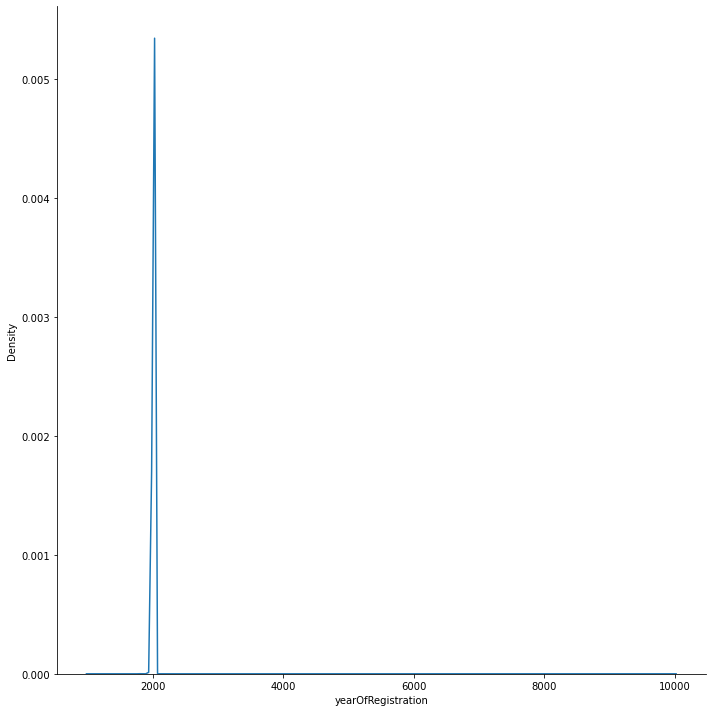

In [83]:
sns.displot(data=data,x='yearOfRegistration',kind='kde',height=10)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

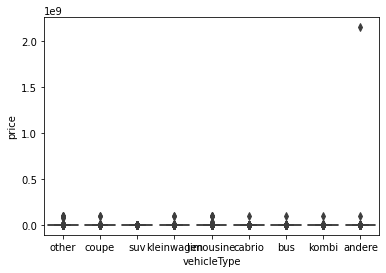

In [84]:
sns.boxplot(x="vehicleType",y="price",data=data,)
#ax.text("hello this sample text ..",fontsize=18,color="r",ha="center",va="center")

In [85]:
# # mean of the prices of all vehicle type 
median_=data.groupby('vehicleType')['price'].median()
#75 th percentile 
quantile75_=data.groupby('vehicleType')['price'].quantile(0.75)
#25 th percentile 
quantile25_=data.groupby('vehicleType')['price'].quantile(0.25)

#Cal iq values of prices of each vehicle type above which all the values are outliers 
iqr=(quantile75_ - quantile25_)*1.5+median_
iqr

vehicleType
andere         8434.0
bus           13948.5
cabrio        21400.0
coupe         24300.0
kleinwagen     5775.0
kombi         13076.5
limousine     12801.5
other          5100.0
suv           28800.0
Name: price, dtype: float64

In [86]:

#! removing outliers 
data=data[
          ((data['vehicleType']=="andere") & (data['price'] <= 8434)) | 
          ((data['vehicleType']=="bus") & (data['price'] <= 13948)) | 
          ((data['vehicleType']=="cabrio") & (data['price'] <= 21400)) | 
          ((data['vehicleType']=="coupe") & (data['price'] <= 24300)) | 
          ((data['vehicleType']=="kleinwagen") & (data['price'] <= 13076)) | 
          ((data['vehicleType']=="limousine") & (data['price'] <= 12801)) | 
          ((data['vehicleType']=="other") & (data['price'] <= 12801)) |
          ((data['vehicleType']=="suv") & (data['price'] <= 28800)) 


]
data.shape

(280043, 20)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280043 entries, 0 to 371525
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          280043 non-null  object
 1   name                 280043 non-null  object
 2   seller               280043 non-null  object
 3   offerType            280043 non-null  object
 4   price                280043 non-null  int64 
 5   abtest               280043 non-null  object
 6   vehicleType          280043 non-null  object
 7   yearOfRegistration   280043 non-null  int64 
 8   gearbox              262164 non-null  object
 9   powerPS              280043 non-null  int64 
 10  model                262826 non-null  object
 11  kilometer            280043 non-null  int64 
 12  monthOfRegistration  280043 non-null  int64 
 13  fuelType             250987 non-null  object
 14  brand                280043 non-null  object
 15  notRepairedDamage    220000 non-nu

In [88]:
data['gearbox'].isnull().sum()

17879

In [89]:
data['gearbox'].unique()
data['gearbox'].fillna("other",inplace=True)
data['gearbox'].isnull().values.sum()

0

In [90]:
data['model'].unique()
data['model'].isnull().sum()
data['model'].fillna("other",inplace=True)
data['model'].isnull().values.sum()

0

In [91]:
data['fuelType'].unique()
data['fuelType'].isnull().sum()
data['fuelType'].fillna("other",inplace=True)
data['fuelType'].isnull().values.sum()

0

In [92]:

data['notRepairedDamage'].unique()
data['notRepairedDamage'].isnull().sum()
data['notRepairedDamage'].fillna("other",inplace=True)
data['notRepairedDamage'].isnull().values.sum()

0

In [93]:
del data['nrOfPictures']

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          371528 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [95]:
data['dateCrawled']
data['dateCreated']

0         2016-03-24 00:00:00
1         2016-03-24 00:00:00
2         2016-03-14 00:00:00
3         2016-03-17 00:00:00
4         2016-03-31 00:00:00
                 ...         
371521    2016-03-27 00:00:00
371522    2016-03-21 00:00:00
371523    2016-03-14 00:00:00
371524    2016-03-05 00:00:00
371525    2016-03-19 00:00:00
Name: dateCreated, Length: 280043, dtype: object

In [98]:
data.to_csv('cleanedauto1.csv',index=False)

In [99]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 6E20-CE0A

 Directory of C:\Users\Rajalakshmi K K

12-08-2021  15:54           507,611  Exploratory Data Analysis - Terrorism.ipynb
12-08-2021  18:22    <DIR>          .
12-08-2021  18:22    <DIR>          ..
08-08-2021  12:13    <DIR>          .android
16-06-2021  08:54    <DIR>          .conda
06-08-2021  11:22    <DIR>          .gradle
23-04-2021  12:25    <DIR>          .idlerc
12-08-2021  16:31    <DIR>          .ipynb_checkpoints
22-04-2021  18:31    <DIR>          .ipython
01-06-2021  14:13    <DIR>          .jdks
08-08-2021  18:07    <DIR>          .jupyter
25-04-2021  08:55    <DIR>          .matplotlib
23-04-2021  17:53    <DIR>          .vscode
02-06-2021  08:42    <DIR>          .wallaby
20-04-2021  12:38    <DIR>          3D Objects
29-04-2021  16:48            36,240 Assignment 3 (statistics for data science).ipynb
11-05-2021  07:58             9,870 Assignment 4.ipynb
12-08-2021  16:48        68,439,217 autos.csv
19-

In [100]:
new_data=pd.read_csv('cleanedauto1.csv')
new_data.shape
new_data.info()

new_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280043 entries, 0 to 280042
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          280043 non-null  object
 1   name                 280043 non-null  object
 2   seller               280043 non-null  object
 3   offerType            280043 non-null  object
 4   price                280043 non-null  int64 
 5   abtest               280043 non-null  object
 6   vehicleType          280043 non-null  object
 7   yearOfRegistration   280043 non-null  int64 
 8   gearbox              280043 non-null  object
 9   powerPS              280043 non-null  int64 
 10  model                280043 non-null  object
 11  kilometer            280043 non-null  int64 
 12  monthOfRegistration  280043 non-null  int64 
 13  fuelType             280043 non-null  object
 14  brand                280043 non-null  object
 15  notRepairedDamage    280043 non-nu

(280043, 19)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

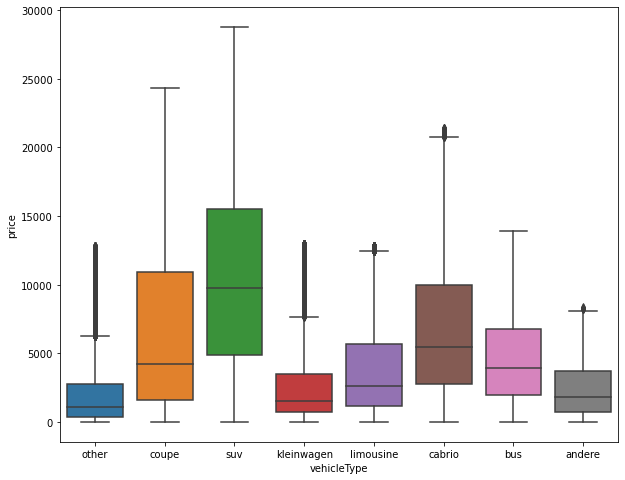

In [101]:
plt.figure(figsize=(10,8))
sns.boxplot(x="vehicleType",y="price",data=new_data)

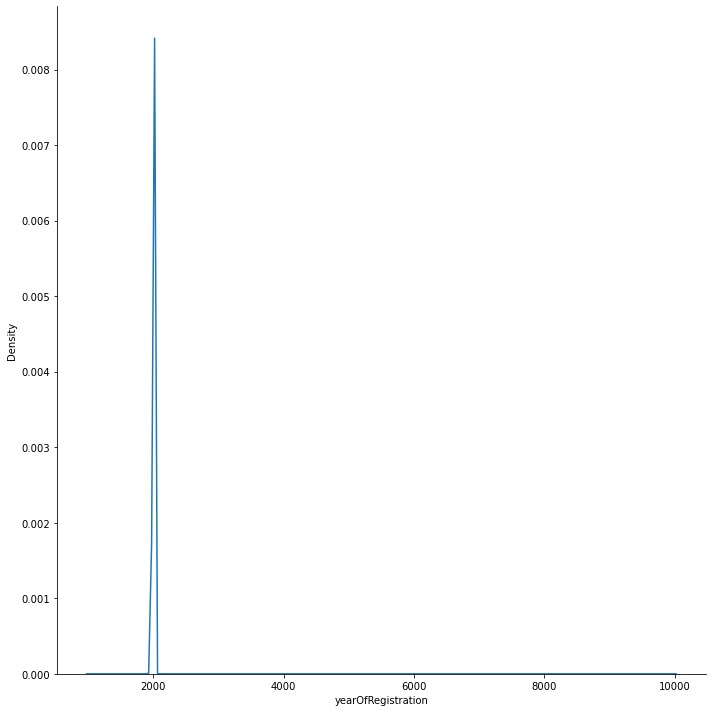

In [102]:
sns.displot(data=new_data,x='yearOfRegistration',kind='kde',height=10)

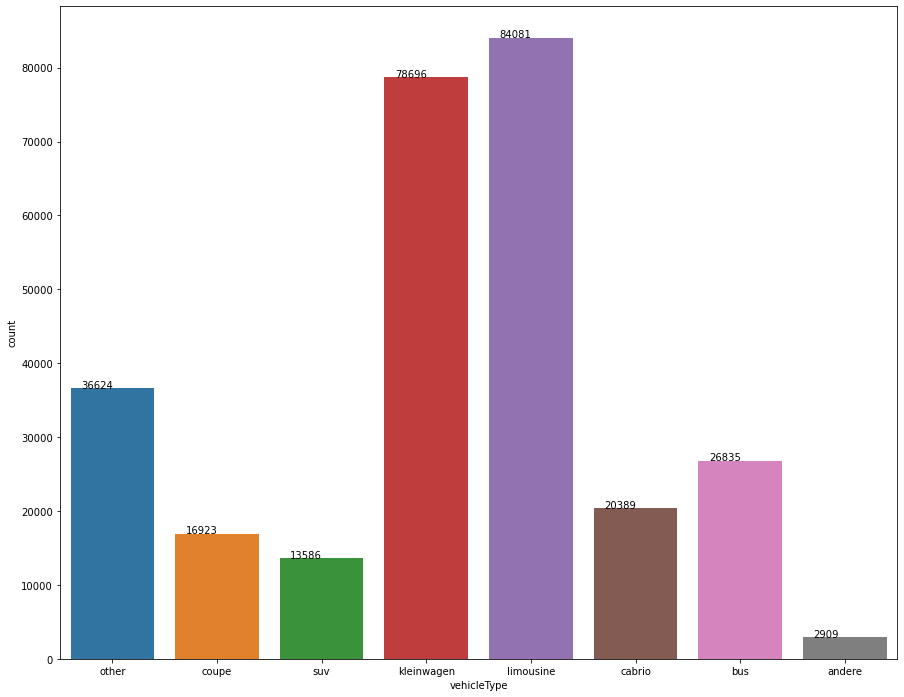

In [103]:
fig,ax=plt.subplots(figsize=(15,12))
sns.countplot(data=new_data,x='vehicleType')

for p in ax.patches: 
  ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+50))